A very common functional form you will run into, particularly when dealing with cylindrical coordinates, looks like:

$$x^2\frac{d^2y}{dx^2} + \frac{dy}{dx} + (x^2 - \alpha^2)y = 0$$

The bad news is: you can't solve this with any of the methods we've examined so far. Go ahead. Try. Knock yourself out. The good news: some poor bloke did the math for you and went and named a function after himself for all that hard work. That's right. We're going to be looking at bessel functions. The general solution to the function can be expressed in terms of this new function:

$$ y = c_1J_{\alpha}(x) + c_2Y_{\alpha}(x)$$

The J function reads "Bessel function of the first kind of order $\alpha$", and the Y function reads "Bessel function of the second kind of order $\alpha$". You're in luck. We're not going to derive them for you here, but here's what they look like under the hood:

$$J_{\alpha}(x) = x^{\alpha}\sum_{m=0}^{\infty}{\frac{(-1)^mx^{2m}}{2^{\alpha + 2m}m!\gamma(m+\alpha+1)}} $$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import jv, kv, iv, yv
import matplotlib.cm as cm

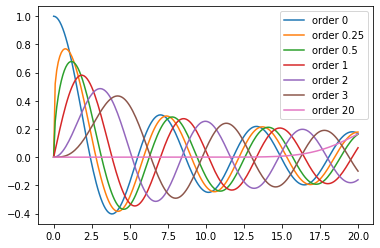

In [2]:
x = np.linspace(0, 20, 201)
bess1 = {}
bess1[0] = jv(0, x)
bess1[0.25] = jv(0.25, x)
bess1[0.5] = jv(0.5, x)
bess1[1] = jv(1, x)
bess1[2] = jv(2, x)
bess1[3] = jv(3, x)
bess1[20] = jv(20, x)


fig, ax = plt.subplots()

for i in bess1:
    ax.plot(x, bess1[i], label="order {}".format(i))
ax.legend()

(-1.2, 2.0)

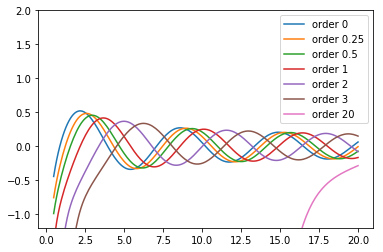

In [35]:
x = np.linspace(0.5, 20, 201)
bess2 = {}
bess2[0] = yv(0, x)
bess2[0.25] = yv(0.25, x)
bess2[0.5] = yv(0.5, x)
bess2[1] = yv(1, x)
bess2[2] = yv(2, x)
bess2[3] = yv(3, x)
bess2[20] = yv(20, x)


fig, ax = plt.subplots()

for i in bess2:
    ax.plot(x, bess2[i], label="order {}".format(i))
ax.legend()
ax.set_ylim([-1.2, 2.0])

(-0.2, 5)

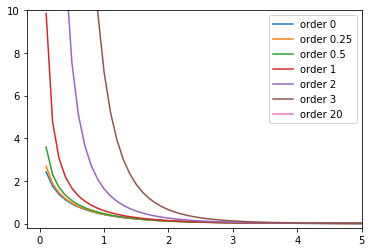

In [41]:
x = np.linspace(0, 20, 201)
modbess1 = {}
modbess1[0] = kv(0, x)
modbess1[0.25] = kv(0.25, x)
modbess1[0.5] = kv(0.5, x)
modbess1[1] = kv(1, x)
modbess1[2] = kv(2, x)
modbess1[3] = kv(3, x)
modbess1[20] = kv(20, x)


fig, ax = plt.subplots()

for i in modbess1:
    ax.plot(x, modbess1[i], label="order {}".format(i))
ax.legend()
ax.set_ylim([-0.2, 10])
ax.set_xlim([-0.2, 5])

(-0.2, 5)

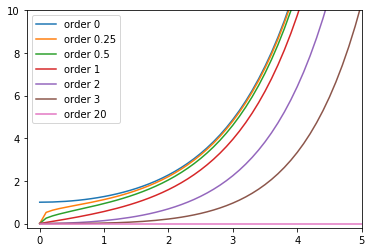

In [42]:
x = np.linspace(0, 20, 201)
modbess2 = {}
modbess2[0] = iv(0, x)
modbess2[0.25] = iv(0.25, x)
modbess2[0.5] = iv(0.5, x)
modbess2[1] = iv(1, x)
modbess2[2] = iv(2, x)
modbess2[3] = iv(3, x)
modbess2[20] = iv(20, x)


fig, ax = plt.subplots()

for i in modbess2:
    ax.plot(x, modbess2[i], label="order {}".format(i))
ax.legend()
ax.set_ylim([-0.2, 10])
ax.set_xlim([-0.2, 5])

Bessel functions can be used to solve a family of problems by using this handy theorem:

*If $(1-a^2) \ge 4c$ and if neither d, p, nor q is zero, then except in the special case when it reduces to Euler's equation, the ODE*

$$x^2 \frac{d^2y}{dx^2} + x(a + 2bx^p)\frac{dy}{dx} + [c + dx^{2q} + b(a+p-1)x^p + b^2x^{2p}]y = 0 $$

has the general solution

$$y(x) = x^{\alpha}e^{-\beta x^p}[c_1 J_v(\lambda x^q)+ c_2 Y_v(\lambda x^q)] $$

where

$$\alpha = \frac{1 - a}{2}, \beta = \frac{b}{p}, \lambda = \frac{\sqrt{\mid d \mid}}{q}, v = \frac{[(1-a)^2 - 4c]^{1/2}}{2q} $$

If d<0, $J_v$ and $Y_v$ should be replace with $I_v$ and $K_v$ respectively.  

(The special case of Euler's equation can be reduced to a simpler equation using substitution methods)

$$a_0 x^2 \frac{d^2y}{dx^2} + a_1 x \frac{dy}{dx} + a_2 y = 0 $$

using the substitution:

$$x = e^z $$

Gives:

$$a_0 \frac{d^2 y}{dz^2} + (a_1 - a_0)\frac{dy}{dz} + a_2 y = 0 $$

## Example 1

Determine the steady-state temperature distribution in an infinitely long solid cylinder of radius R, in which heat is generated per unit volume at rate (a + bT), where a and b are positive constants and T is temperature. The external surface temperature is maintained at constant temperature $T_0$.

The relevant ODE is:

$$\frac{k}{r}\frac{d}{dr}\bigg[ r \frac{dT}{dr} \bigg] = -(a + bT), r \in (0, R), T(R)=T_0 $$

Implied is the symmetry condition:

$$\frac{dT}{dr}(0) = 0 $$

The ODE can be re-written as:

$$r^2 \frac{d^2T}{dr^2}+ r \frac{dT}{dr} + (a + bT)\frac{r^2}{k} = 0 $$

If we make the change of variables u = a + bT, we get:

$$r^2 \frac{d^2u}{dr^2} + r\frac{du}{dr} + \frac{b}{k}r^2u = 0 $$

Using the theorem above:

$$a=1, b=0, c=0, d=\frac{b}{k}>0, q=1 $$

So that

$$\alpha=0, \beta=0, \lambda=\sqrt{(b/k)}, \nu=0 $$

This gives the solution:

$$u(r) = c_1 J_0(r \sqrt{b/k}) + c_2 Y_0(r \sqrt{b/k}) $$

Back in the original space:

$$ T(r) = \frac{1}{b}[c_1 J_0(r \sqrt{b/k}) + c_2 Y_0(r \sqrt{b/k}) - a]$$

Using the BCs, we find:

$$c_2=0, c_1 = \frac{a + bT_0}{J_0(R \sqrt{b/k})} $$

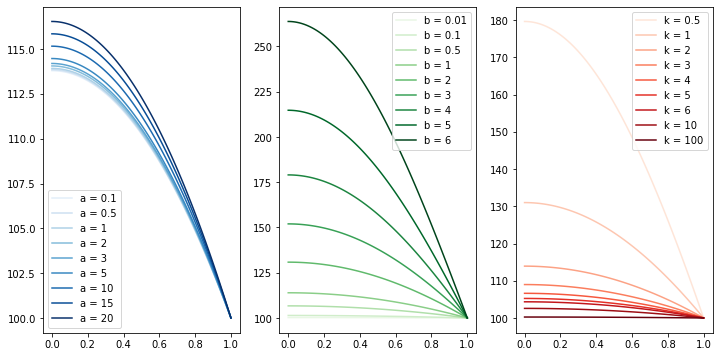

In [18]:
a = 1
b = 1
k = 2
R = 1
T0 = 100
r = np.linspace(0, R, 101)
fig, ax = plt.subplots(ncols=3, figsize=(12,6))

c1 = cm.Blues(np.linspace(0.1,1,9))
c2 = cm.Greens(np.linspace(0.1,1,9))
c3 = cm.Reds(np.linspace(0.1,1,9))

for i, a in enumerate([0.1, 0.5, 1, 2, 3, 5, 10, 15, 20]):
    c = (a + b*T0)/(jv(0, R*np.sqrt(b/k)))
    T = (c*jv(0, r*np.sqrt(b/k)) - a)/b
    ax[0].plot(r, T, c=c1[i], label='a = {}'.format(a))
    
a=1
for i, b in enumerate([0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 6]):
    c = (a + b*T0)/(jv(0, R*np.sqrt(b/k)))
    T = (c*jv(0, r*np.sqrt(b/k)) - a)/b
    ax[1].plot(r, T, c=c2[i], label='b = {}'.format(b))
    
b=1
for i, k in enumerate([0.5, 1, 2, 3, 4, 5, 6, 10, 100]):
    c = (a + b*T0)/(jv(0, R*np.sqrt(b/k)))
    T = (c*jv(0, r*np.sqrt(b/k)) - a)/b
    ax[2].plot(r, T, c=c3[i], label='k = {}'.format(k))

ax[0].legend()
ax[1].legend()
ax[2].legend()

## Example 2

Determine the steady-state concentration distribution C(r) and the effectiveness factor for an isothermal first-order reaction occurring in an infinitely long cylindrical porous catalyst pellet of radius R. The external surface is maintained at a constant reactant concentration $C_0$.

The ODE is:

$$\frac{D}{r}\frac{d}{dr}\bigg[ r \frac{dC}{dr} \bigg] = kC, r \in (0, R), C(R)=C_0, C=finite$$

The problem is made dimensionless with the terms

$$s = \frac{r}{R}, u = \frac{C}{C_0}, \phi^2 = \frac{kR^2}{D} $$

Rearranging

$$s^2 \frac{d^2u}{ds^2} + s \frac{du}{ds} - \phi^2s^2u = 0 $$

Using the theorem:

$$a=1, b=0, c=0, d=-\phi^2<0, q=1 $$

so that

$$\alpha=0, \beta=0, \lambda=\phi, \nu=0 $$

This gives the solution

$$u(s) = c_1I_0(\phi_0s) + c_2K_0(\phi s) $$

Using the BCs

$$c_2=0, c_1=\frac{1}{I_0(\phi)} $$

This gives the solution:

$$u(s) = \frac{I_0(\phi s)}{I_0(\phi)} $$

(0, 1.3)

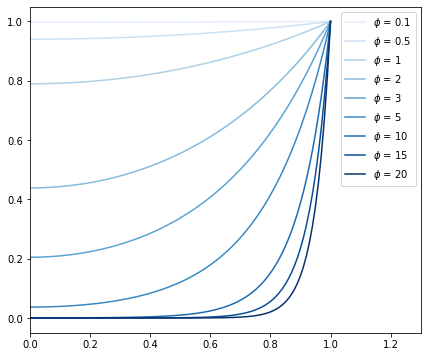

In [21]:
s = np.linspace(0, 1, 101)
fig, ax = plt.subplots(figsize=(7,6))

c1 = cm.Blues(np.linspace(0.1,1,9))

for i, phi in enumerate([0.1, 0.5, 1, 2, 3, 5, 10, 15, 20]):
    u = iv(0, phi*s)/iv(0, phi)
    ax.plot(s, u, c=c1[i], label=r'$\phi$ = {}'.format(phi))
    
ax.legend()
ax.set_xlim([0, 1.3])

## Useful relationships to have on hand:

$$E_{\alpha-1}(x)+E_{\alpha+1}(x)=\frac{2\alpha}{x}E_{\alpha}(x) \qquad (J,Y) $$
$$E_{\alpha-1}(x)-E_{\alpha+1}(x)=2E'_{\alpha}(x) \qquad (J,Y) $$
$$E _ { \alpha } ^ { \prime } ( x ) = E _ { \alpha - 1 } ( x ) - \frac { \alpha } { x } E _ { \alpha } ( x ) \qquad (J,Y,I)$$
$$E _ { \alpha } ^ { \prime } ( x ) = - E _ { \alpha + 1 } ( x ) + \frac { \alpha } { x } E _ { \alpha } ( x ) \qquad (J,Y,K)$$
$$\frac { d } { d x } \left[ x ^ { \alpha } E _ { \alpha } ( x ) \right] = x ^ { \alpha } E _ { \alpha - 1 } ( x ) \qquad (J,Y,I) $$
$$\frac { d } { d x } \left[ x ^ { - \alpha } E _ { \alpha } ( x ) \right] = - x ^ { - \alpha } E _ { \alpha + 1 } ( x ) \qquad (J,Y,K)$$

$$I_{\alpha-1}(x)-I_{\alpha+1}(x)=\frac{2 \alpha}{x} I_{\alpha}(x)$$
$$K_{\alpha-1}(x)-K_{\alpha+1}(x)=-\frac{2 \alpha}{x} K_{\alpha}(x)$$
$$I_{\alpha-1}(x)+I_{\alpha+1}(x)=2 \Gamma_{\alpha}(x)$$
$$-K_{\alpha-1}(x)-K_{\alpha+1}(x)=2 K_{\alpha}^{\prime}(x)$$
$$K_{\alpha}^{\prime}(x)=-K_{\alpha+1}(x)-\frac{\alpha}{x} K_{\alpha}(x)$$
$$I_{\alpha}^{\prime}(x)=I_{\alpha+1}(x)+\frac{\alpha}{x} I_{\alpha}(x)$$
$$\frac{d}{d x}\left[x^{\alpha} K_{\alpha}(x)\right]=-x^{\alpha} K_{\alpha-1}(x)$$
$$\frac{d}{d x}\left[x^{-\alpha} I_{\alpha}(x)\right]=x^{-\alpha} I_{\alpha+1}(x)$$